'''''' Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots ''''''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving book.csv to book.csv


In [ ]:
bank= pd.read_csv('book.csv')
bank.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
bank1= bank.copy()

In [ ]:
bank1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [ ]:
bank1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [ ]:
bank1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [ ]:
bank1.shape

(2000, 11)

In [ ]:
item_sets= {}

In [ ]:
te= TransactionEncoder()

In [ ]:
te_ary= te.fit(bank1).transform(bank1)

In [ ]:
ap= pd.DataFrame(te_ary, columns= te.columns_)

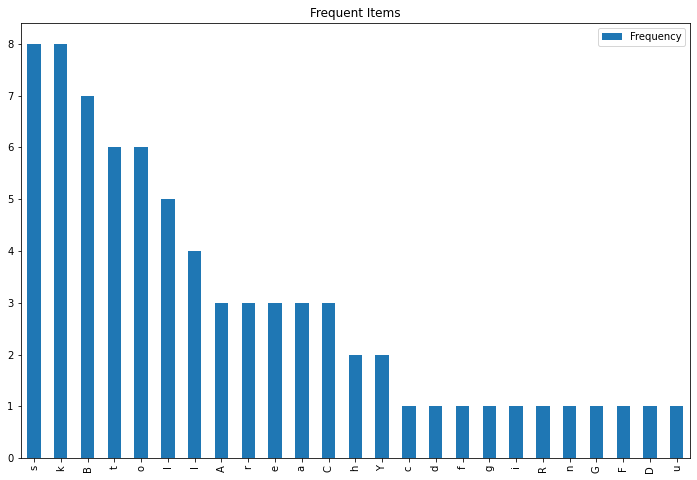

In [ ]:
ap.sum().to_frame('Frequency').sort_values('Frequency', ascending= False)[:25].plot(kind='bar', figsize= (12,8), title= 'Frequent Items')
plt.show()

# Apriori Algorithm

In [ ]:
ap_05= {}
ap_1= {}
ap_5= {}
ap_1_0= {}

In [ ]:
confidence= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
def gen_rules(movie, confidence, support):
  ap= {}
  for i in confidence:
    ap_i= apriori(bank1, support, True)
    rule= association_rules(ap_i, min_threshold=i)
    ap[i]= len(rule.antecedents)
  return pd.Series(ap).to_frame('Support: %s' %support)

In [ ]:
confs= []

In [ ]:
for i in [0.005, 0.001, 0.003, 0.007]:
  ap_i= gen_rules(ap,confidence= confidence, support= i)  
  confs.append(ap_i)

In [ ]:
all_conf= pd.concat(confs, axis= 1)

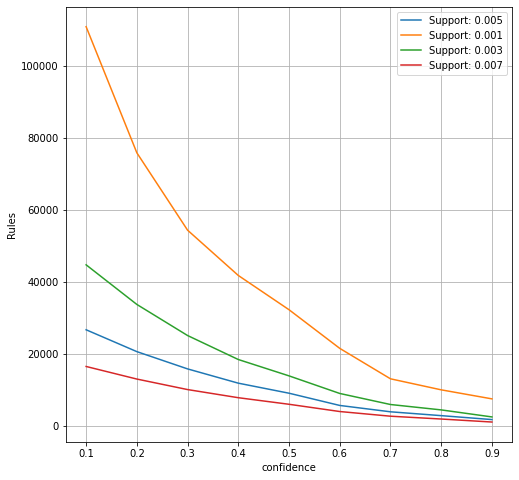

In [ ]:
all_conf.plot(figsize=(8,8), grid= True)
plt.ylabel('Rules')
plt.xlabel('confidence')
plt.show()

# Conclusion
'''As shown in above graph
1. Lower the Confidence level Higher the no. of rules.

2. Higher the Support, lower the no. of rules.'''

# Lets try with Support 0.005 and Confidence at 0.4

In [ ]:
ap_final= apriori(ap, 0.001, True)

In [ ]:
rules_final= association_rules(ap_final, min_threshold= .4, support_only= False)

In [ ]:
rules_final[rules_final['confidence']> 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(r),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
742,"(B, Y)","(s, k, t, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
743,"(t, B)","(s, Y, k, o)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970
744,"(Y, k)","(s, B, t, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
745,"(t, Y)","(s, B, k, o)",0.0010,0.0020,0.001,1.000000,500.000000,0.000998,inf


In [ ]:
support = rules_final['support']
confidence= rules_final['confidence']
lift= rules_final['lift']

Text(0.5, 0, 'lift')

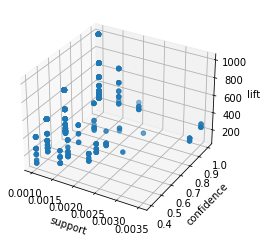

In [ ]:
fig1= plt.figure()
ax1= fig1.add_subplot(111, projection= '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel('support')
ax1.set_ylabel('confidence')
ax1.set_zlabel('lift')

Text(0, 0.5, 'confidence')

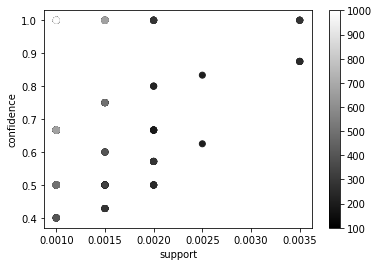

In [ ]:
plt.scatter(support, confidence, c= lift, cmap= 'gray')
plt.colorbar()
plt.xlabel('support');plt.ylabel('confidence')